# Cape Town Airbnb EDA

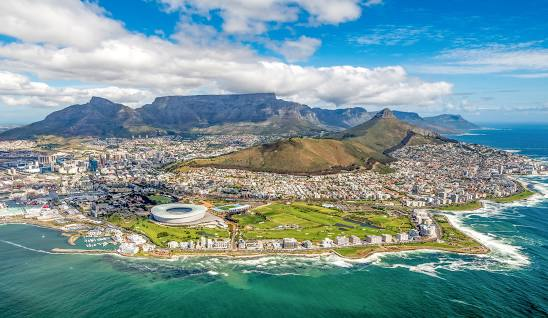

## Lets explore the dataset


The three questions that will guide our analysis include:
1. What are the Airbnb listing characteristics (such as, accomodation types, room types and property types) available for bookings in the city?
2. Which variables influences price the most? 
3. Can we predict listing prices for the Airbnb homestays within the city?

I will apply the data science process: CRoss Industry Standard Process for Data Mining (CRISP-DM) to answer the questions

# 1. Loading Libraries

In [236]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv("listings.csv") 



# 2. Data exploration 

In [126]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20230329174558,2023-03-30,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,4.96,4.75,4.80,NaN,t,1,1,0,0,0.61
1,1048451,https://www.airbnb.com/rooms/1048451,20230329174558,2023-03-30,city scrape,Beautiful Beach Flat,<b>The space</b><br />A lovely beach flat in C...,NaN,https://a0.muscache.com/pictures/15763616/823e...,5589045,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.01
2,15007,https://www.airbnb.com/rooms/15007,20230329174558,2023-03-30,city scrape,Blaauwberg House (now with inverter),Welcome to our self-catering beach-front famil...,"Bloubergstrand is a lovely, cosy suburb near C...",https://a0.muscache.com/pictures/3b654aa4-248e...,59072,...,4.95,4.95,4.85,NaN,f,3,3,0,0,0.37
3,473856,https://www.airbnb.com/rooms/473856,20230329174558,2023-03-30,city scrape,Explore Cape Town from a Cosy Apartment in a P...,Contemporary apartment with balcony and lovely...,The apartment is in a very central location in...,https://a0.muscache.com/pictures/9aac21ba-d21b...,2349400,...,4.90,4.83,4.77,NaN,f,4,4,0,0,1.30
4,15077,https://www.airbnb.com/rooms/15077,20230329174558,2023-03-30,city scrape,Top relaxed beach living in style,Situated either on the ground floor with direc...,It is probably the best hub in order to explor...,https://a0.muscache.com/pictures/4a8fceaa-655e...,59342,...,4.71,4.86,5.00,NaN,f,6,1,5,0,0.06


In [75]:
# checking the data shape
df.shape

(19751, 75)

In [76]:
df.describe(include='all' )

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.975100e+04,19751,1.975100e+04,19751,19751,19751,19496,12736,19751,1.975100e+04,...,15671.000000,15668.000000,15668.000000,95,19751,19751.000000,19751.000000,19751.00000,19751.000000,15780.000000
unique,NaN,19751,NaN,3,2,19384,18682,10630,19484,NaN,...,NaN,NaN,NaN,79,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/3191,NaN,2023-03-30,city scrape,Brand New Studio| Heart of Sea Point | Rooftop...,Keep it simple at this peaceful and centrally-...,Camps Bay is movie-set pretty with its palm-li...,https://a0.muscache.com/pictures/miso/Hosting-...,NaN,...,NaN,NaN,NaN,4660244676,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,16357,18335,11,41,59,7,NaN,...,NaN,NaN,NaN,8,13624,NaN,NaN,NaN,NaN,NaN
mean,2.229289e+17,NaN,2.023033e+13,NaN,NaN,NaN,NaN,NaN,NaN,1.508505e+08,...,4.808234,4.798352,4.691300,NaN,NaN,10.559617,9.479672,0.99438,0.015949,0.967079
std,3.373404e+17,NaN,7.007990e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.513166e+08,...,0.443206,0.387502,0.473342,NaN,NaN,22.510388,22.013995,2.42911,0.189867,1.120480
min,3.191000e+03,NaN,2.023033e+13,NaN,NaN,NaN,NaN,NaN,NaN,3.754000e+03,...,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.00000,0.000000,0.010000
25%,2.120056e+07,NaN,2.023033e+13,NaN,NaN,NaN,NaN,NaN,NaN,2.821756e+07,...,4.800000,4.757500,4.620000,NaN,NaN,1.000000,1.000000,0.00000,0.000000,0.210000
50%,4.163143e+07,NaN,2.023033e+13,NaN,NaN,NaN,NaN,NaN,NaN,8.814229e+07,...,4.960000,4.920000,4.820000,NaN,NaN,2.000000,1.000000,0.00000,0.000000,0.590000
75%,6.301989e+17,NaN,2.023033e+13,NaN,NaN,NaN,NaN,NaN,NaN,2.434973e+08,...,5.000000,5.000000,5.000000,NaN,NaN,7.000000,4.000000,1.00000,0.000000,1.340000


In [77]:
# Its often preffered that column names are in lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# Data preparation 

In [78]:
#We can now check for missing values across the columns
df.isna().sum()



id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3971
Length: 75, dtype: int64

In [411]:
# We can use this code as well 
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.

#display.HTML(
print(no_nulls)

{'price', 'host_has_profile_pic', 'host_url', 'name', 'availability_90', 'longitude', 'room_type', 'accommodates', 'host_name', 'minimum_nights', 'last_scraped', 'latitude', 'host_picture_url', 'has_availability', 'maximum_nights', 'calendar_last_scraped', 'scrape_id', 'availability_30', 'calculated_host_listings_count_private_rooms', 'neighbourhood_cleansed', 'host_id', 'instant_bookable', 'listing_url', 'source', 'host_thumbnail_url', 'availability_60', 'availability_365', 'number_of_reviews_l30d', 'picture_url', 'host_since', 'host_total_listings_count', 'id', 'number_of_reviews', 'calculated_host_listings_count_shared_rooms', 'host_identity_verified', 'host_listings_count', 'number_of_reviews_ltm', 'property_type', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count', 'amenities', 'host_verifications'}


In [412]:
# Identify features with most missing values more than 50% of the values missing

most_missing_cols = set(df.columns[df.isnull().mean() > 0.30])
print(most_missing_cols)

{'host_about', 'neighbourhood', 'bathrooms', 'neighborhood_overview', 'neighbourhood_group_cleansed', 'host_neighbourhood', 'calendar_updated', 'license'}


Amount of columns with Nans in the Listings Dataset:33


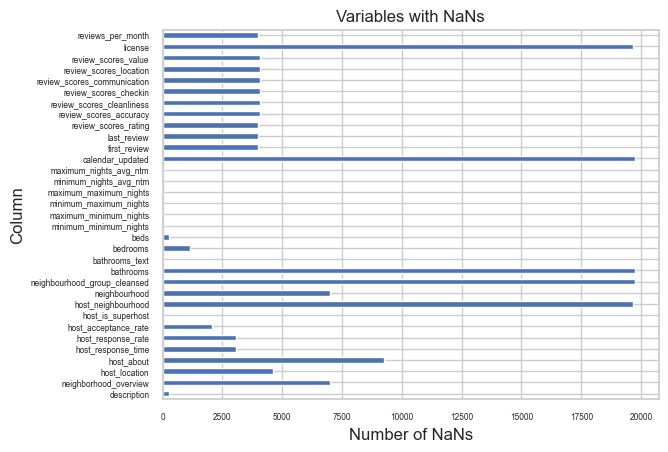

In [413]:
#The missing values can be visualised 
#Printing the amount of columns containing NaNs
print(f"Amount of columns with Nans in the Listings Dataset:{df.isnull().any().sum()}")

#Storing the amount of non-nans
nan_counts = df.isna().sum()

# create a bar chart showing the results
nan_counts[nan_counts!=0].plot(kind='barh')
plt.gca().tick_params(axis='both', labelsize=6)
plt.title('Variables with NaNs')
plt.xlabel('Number of NaNs')
plt.ylabel('Column')
plt.show()

In [414]:
#Removing all the columns that contain only NaNs
df2=df.dropna(axis=1, how='all')



In [415]:
# Check the shape after dropping all features that contained only NaNs
df2.shape

(19751, 72)

In [ ]:
# We can check the column names for all the features 
df2.columns

In [437]:
# We can also check the information about the dataframe (data types) 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17695 entries, 0 to 19750
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17695 non-null  int64  
 1   listing_url                                   17695 non-null  object 
 2   scrape_id                                     17695 non-null  int64  
 3   last_scraped                                  17695 non-null  object 
 4   source                                        17695 non-null  object 
 5   name                                          17695 non-null  object 
 6   description                                   17511 non-null  object 
 7   neighborhood_overview                         11434 non-null  object 
 8   picture_url                                   17695 non-null  object 
 9   host_id                                       17695 non-null 

In [433]:
#Check unique values, this can better inform the type of data contained in the variables 
cols=df2.columns.to_list()

for column in cols:
   print("\n")
   print("Column Name:", column)
   print(df[column].unique())



Column Name: id
[              3191            1048451              15007 ...
 857116008461436507 857118666957317725 857130313334379065]


Column Name: listing_url
['https://www.airbnb.com/rooms/3191'
 'https://www.airbnb.com/rooms/1048451'
 'https://www.airbnb.com/rooms/15007' ...
 'https://www.airbnb.com/rooms/857116008461436507'
 'https://www.airbnb.com/rooms/857118666957317725'
 'https://www.airbnb.com/rooms/857130313334379065']


Column Name: scrape_id
[20230329174558]


Column Name: last_scraped
['2023-03-30' '2023-03-29' '2023-04-03']


Column Name: source
['city scrape' 'previous scrape']


Column Name: name
['Malleson Garden Cottage' 'Beautiful Beach Flat'
 'Blaauwberg House (now with inverter)' ... 'Victorian House-share'
 'Serene and cozy cottage' 'Apartment in the Mountains']


Column Name: description
["This is a lovely, separate, self-catering cottage set apart in the garden. It has its own covered patio with table and chairs. There is a separate bedroom (with queen-siz

In [434]:
#checking for duplicates
df2.duplicated().sum()

0

In [442]:
# We can obtain summary statistics for the DataFrame
summary = df.describe().round(0)

summary

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.975100e+04,1.975100e+04,19751.0,19751.0,19751.0,0.0,19751.0,19751.0,19751.0,0.0,...,15672.0,15667.0,15671.0,15668.0,15668.0,19751.0,19751.0,19751.0,19751.0,15780.0
mean,2.229289e+17,2.023033e+13,150850505.0,13.0,19.0,NaN,-34.0,18.0,4.0,NaN,...,5.0,5.0,5.0,5.0,5.0,11.0,9.0,1.0,0.0,1.0
std,3.373404e+17,7.000000e+00,151316648.0,43.0,78.0,NaN,0.0,0.0,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,23.0,22.0,2.0,0.0,1.0
min,3.191000e+03,2.023033e+13,3754.0,1.0,1.0,NaN,-34.0,18.0,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
25%,2.120056e+07,2.023033e+13,28217564.0,1.0,1.0,NaN,-34.0,18.0,2.0,NaN,...,5.0,5.0,5.0,5.0,5.0,1.0,1.0,0.0,0.0,0.0
50%,4.163143e+07,2.023033e+13,88142287.0,2.0,3.0,NaN,-34.0,18.0,3.0,NaN,...,5.0,5.0,5.0,5.0,5.0,2.0,1.0,0.0,0.0,1.0
75%,6.301989e+17,2.023033e+13,243497285.0,8.0,10.0,NaN,-34.0,18.0,5.0,NaN,...,5.0,5.0,5.0,5.0,5.0,7.0,4.0,1.0,0.0,1.0
max,8.576426e+17,2.023033e+13,507278769.0,2432.0,5180.0,NaN,-34.0,19.0,16.0,NaN,...,5.0,5.0,5.0,5.0,5.0,137.0,130.0,20.0,4.0,21.0


We can see that the dataset containes 19751 rows, some rows includes NaNs and and some columns which are categorial cannot produce the conventional summary statistics; For the variables included in the inferential statitstics, we will need to inspect for inconsistecies such as outliers, and missing values for better inference

# 1. What are the Airbnb listing characteristics (such as, accomodation types, room types and property types) available for bookings in the city?

In [378]:
df2.shape

(17695, 72)

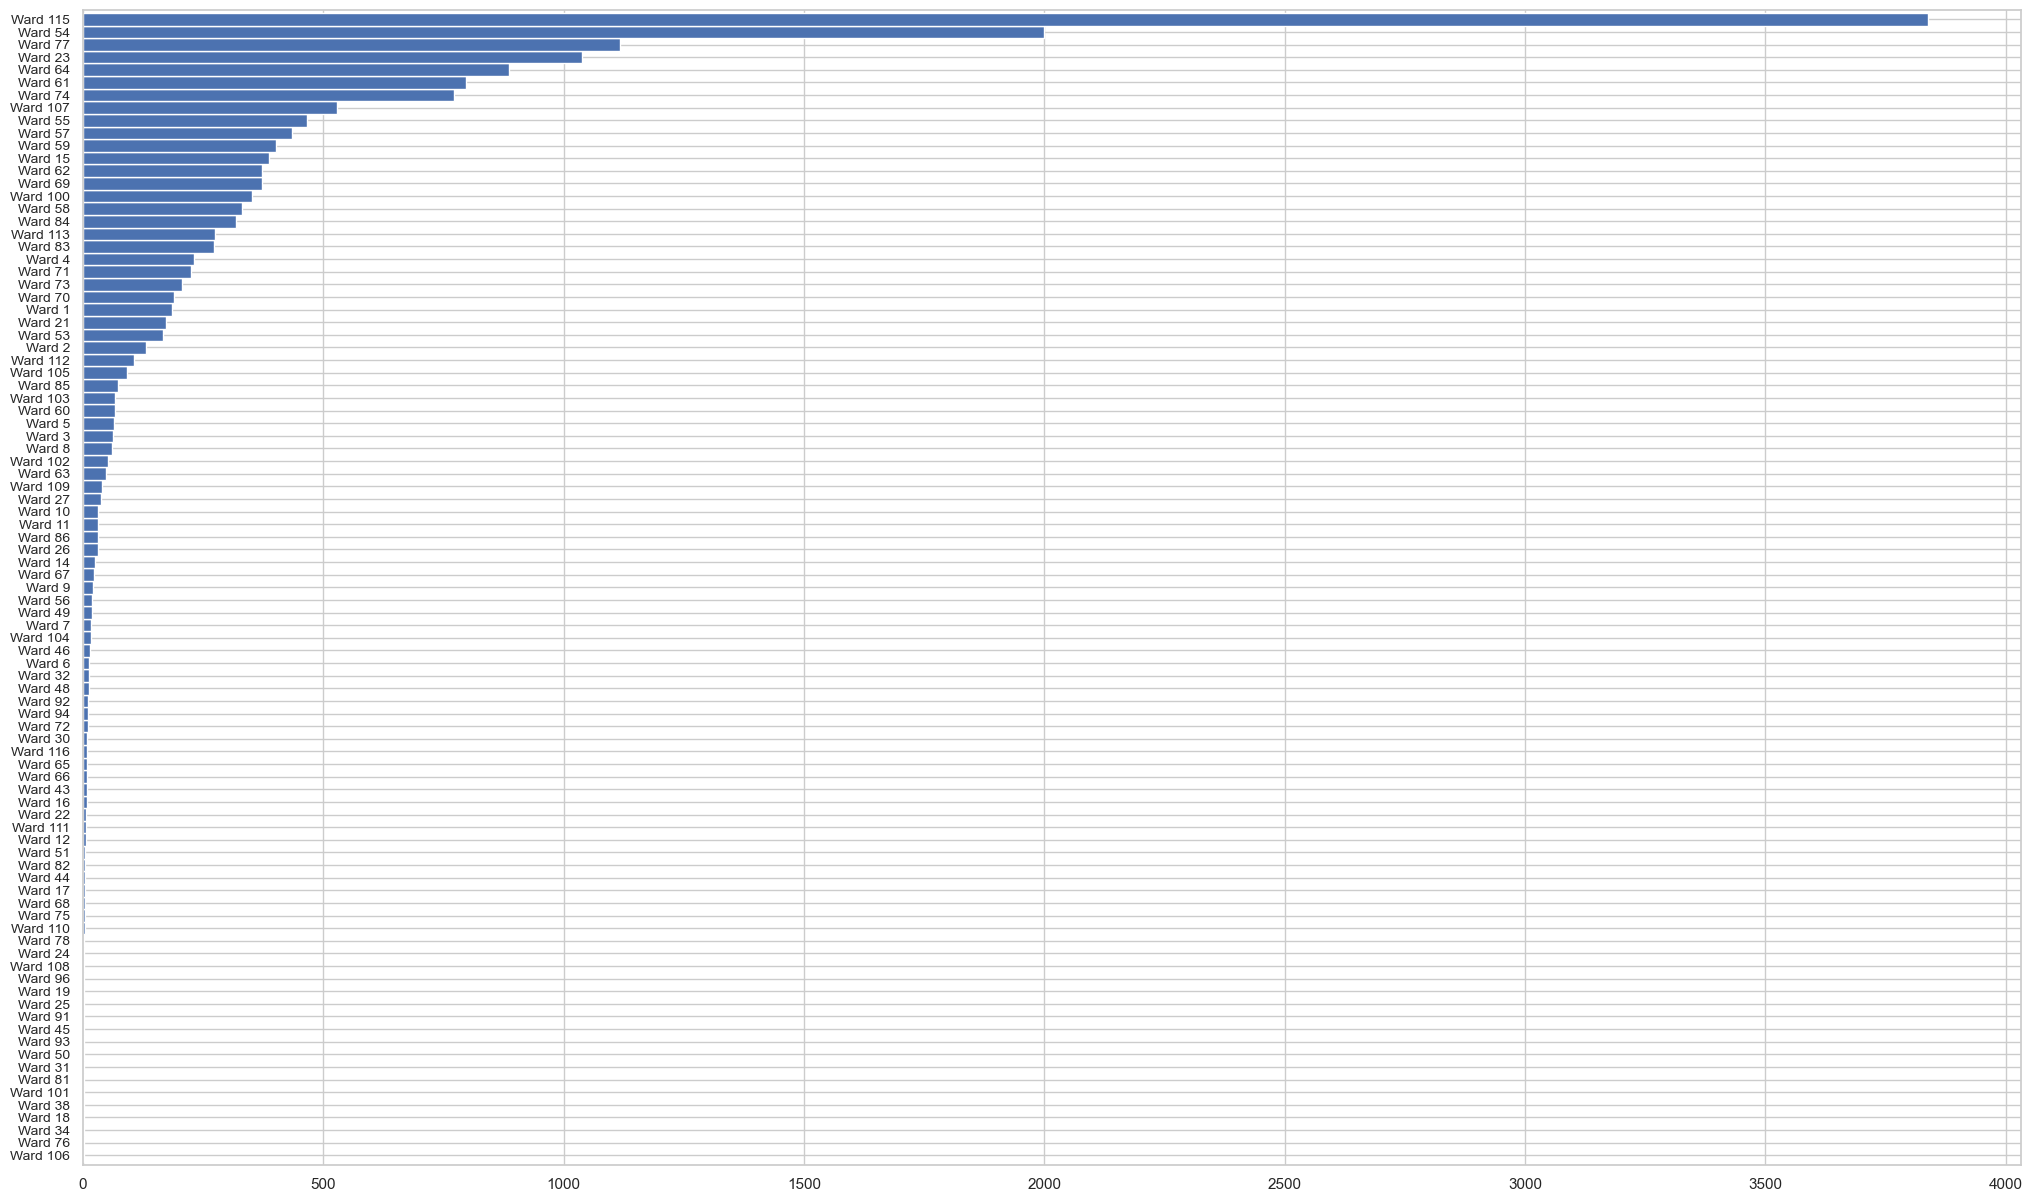

In [537]:
# We can visulaise the neighbourhood
n1 = df2['neighbourhood_cleansed']. value_counts().sort_values(ascending=True)
n1.plot.barh(figsize=(25, 15), width=1)
plt.show()


We notice that Ward 115 is the most popular neighbourhood

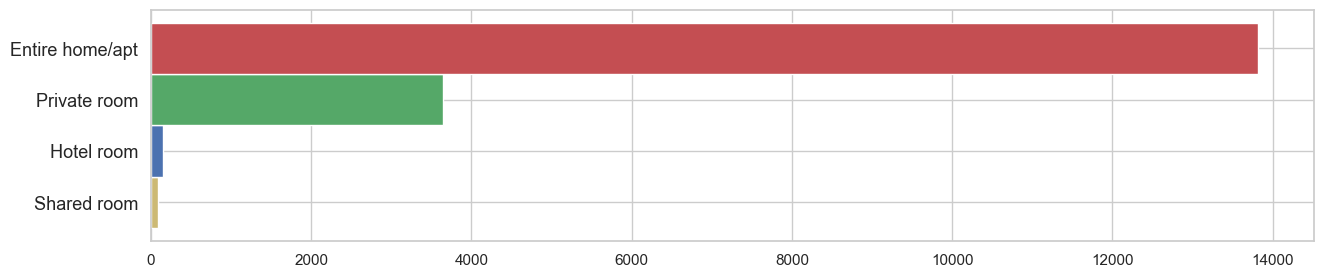

In [445]:
# We can explore the popular room type 
f1 = df2['room_type']. value_counts().sort_values(ascending=True)
f1.plot.barh(figsize=(15, 3), width=1, color = ["y","b",'g', "r"])# from the  unique values check we saw that there could be at least 4 groups
plt.show()


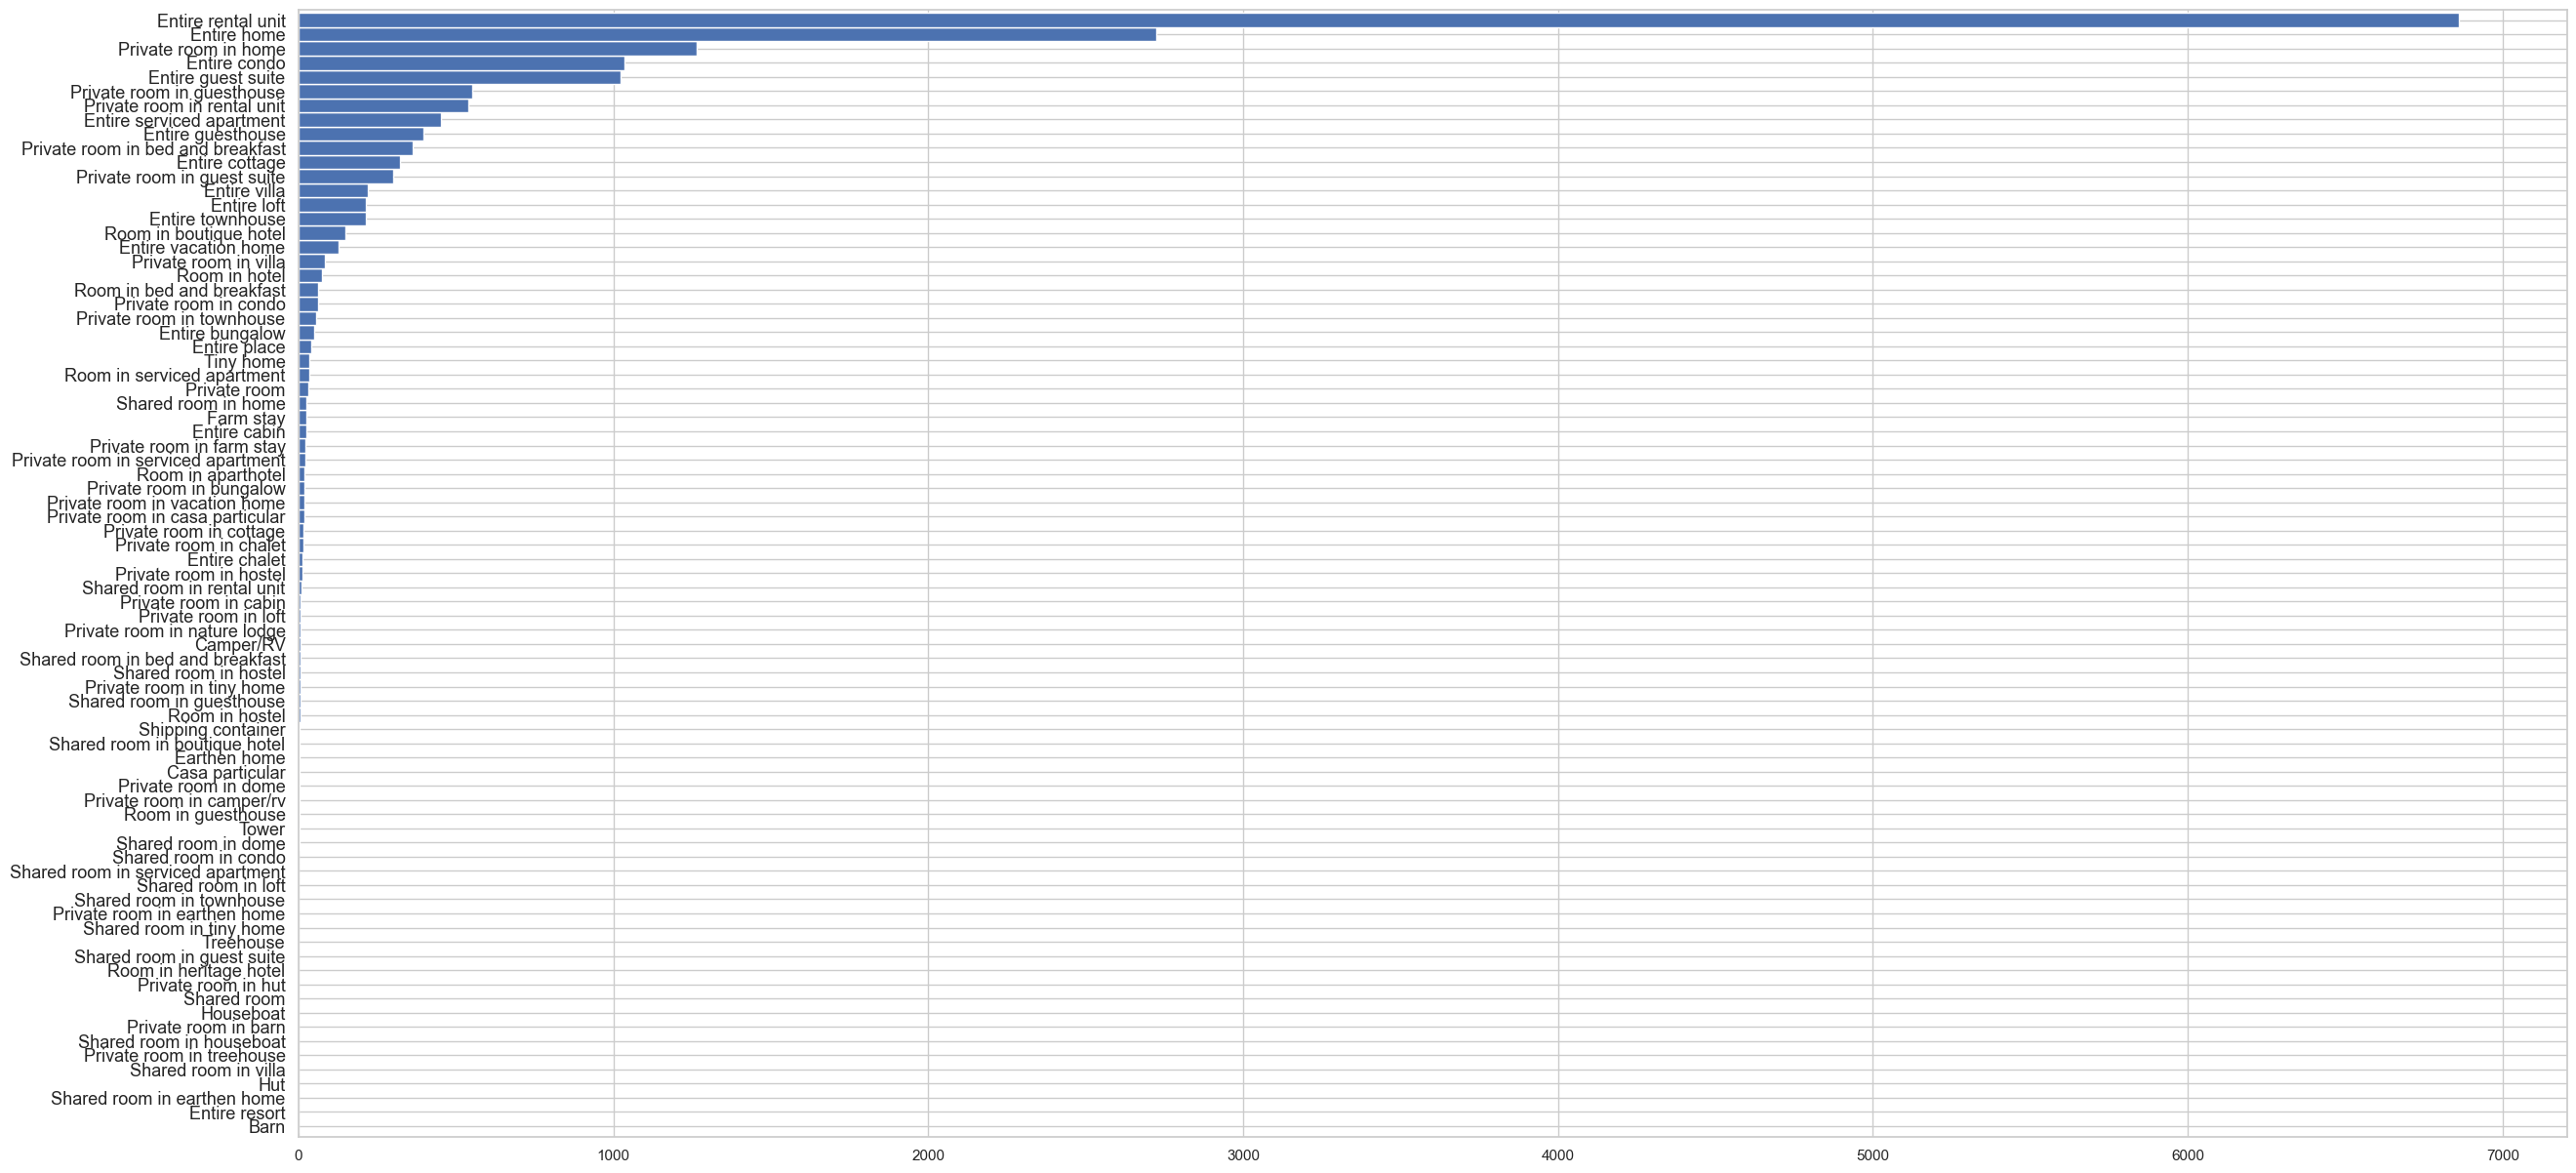

In [452]:
# We can also visualise the property types within the city 
f2 = df2['property_type']. value_counts().sort_values(ascending=True)
f2.plot.barh(figsize=(30, 15), width=1)# from the  unique values check we saw that there could be at least 4 groups
plt.show()

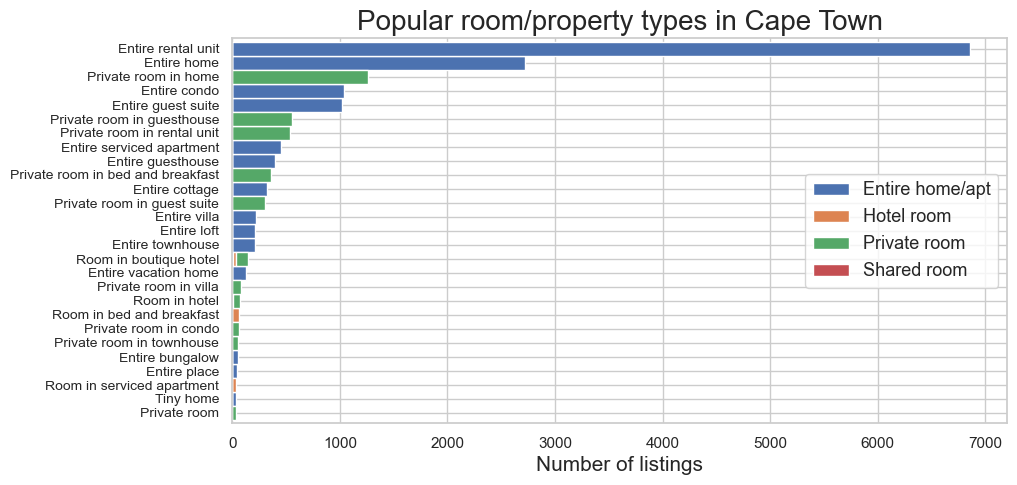

In [458]:
# For better visualisation of property types and room types, we can view the two columms together 
f3 = df2.groupby(['property_type','room_type']).room_type.count()
f3 = f3.unstack()
f3['total'] = f3.iloc[:,0:3].sum(axis = 1)
f3 = f3.sort_values(by=['total'])
f3 = f3[f3['total']>=30]# we choose those with at least 30 listings
f3 = f3.drop(columns=['total'])

f3.plot(kind='barh',stacked=True,
              linewidth = 1, grid=True, figsize=(10,5), width=1)
plt.title('Popular room/property types in Cape Town', fontsize=20)
plt.xlabel('Number of listings', fontsize=15)
plt.ylabel("")
plt.legend(loc = 5,prop = {"size" : 13})
plt.rc('ytick', labelsize=10)
plt.show()

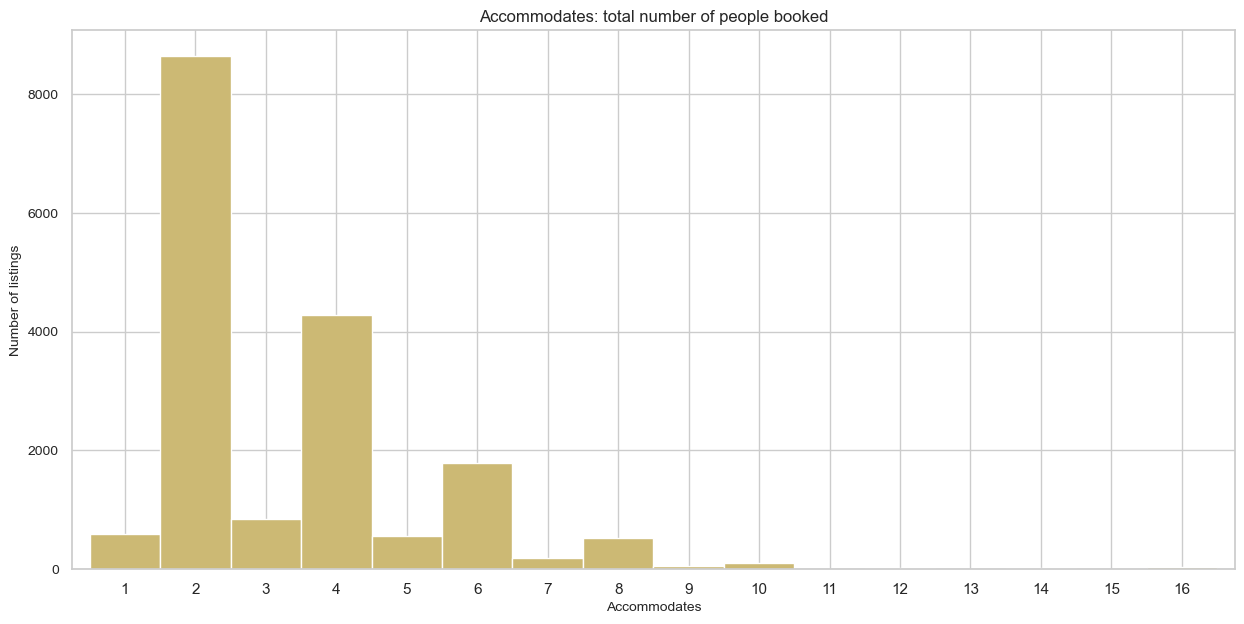

In [463]:
# We can also check the popular total number of persons booked in per room/property 
f3=df2['accommodates'].value_counts().sort_index()
f3.plot.bar(figsize=(15,7), color='y', width=1, rot=0)
plt.title("Accommodates: total number of people booked", fontsize=12)
plt.ylabel('Number of listings', fontsize=10)
plt.xlabel('Accommodates', fontsize=10)
plt.show()

In [614]:
# We may also explore the popular hosts within the city 
f4 = df2.groupby(['host_id', 'host_name','host_response_rate','host_acceptance_rate', 'host_is_superhost']).size().reset_index(name='num_host_listings')
f4 = f4.sort_values(by=['num_host_listings'], ascending=False)
f4 = f4[f4['num_host_listings'] >= 50]# we consider those with over 50 listings within the city 
f4



,host_id,host_name,host_response_rate,host_acceptance_rate,host_is_superhost,num_host_listings
260,3961453,HostAgents,100%,97%,False,128
5804,281646889,Scotty,100%,87%,False,102
7201,487012580,Manageair,99%,98%,False,82
254,3886732,Koos,82%,98%,False,82
5051,185308070,LaStay,99%,99%,False,78
6511,403603800,Hosted,97%,94%,False,76
5315,218745884,Jayson,100%,100%,True,71
5684,261535066,Kim,100%,88%,False,70
167,2516345,Jaco,100%,99%,False,65
6716,434206028,Murray,100%,92%,False,62


This could be surprising that majority of the hosts with most listings are not the superhosts

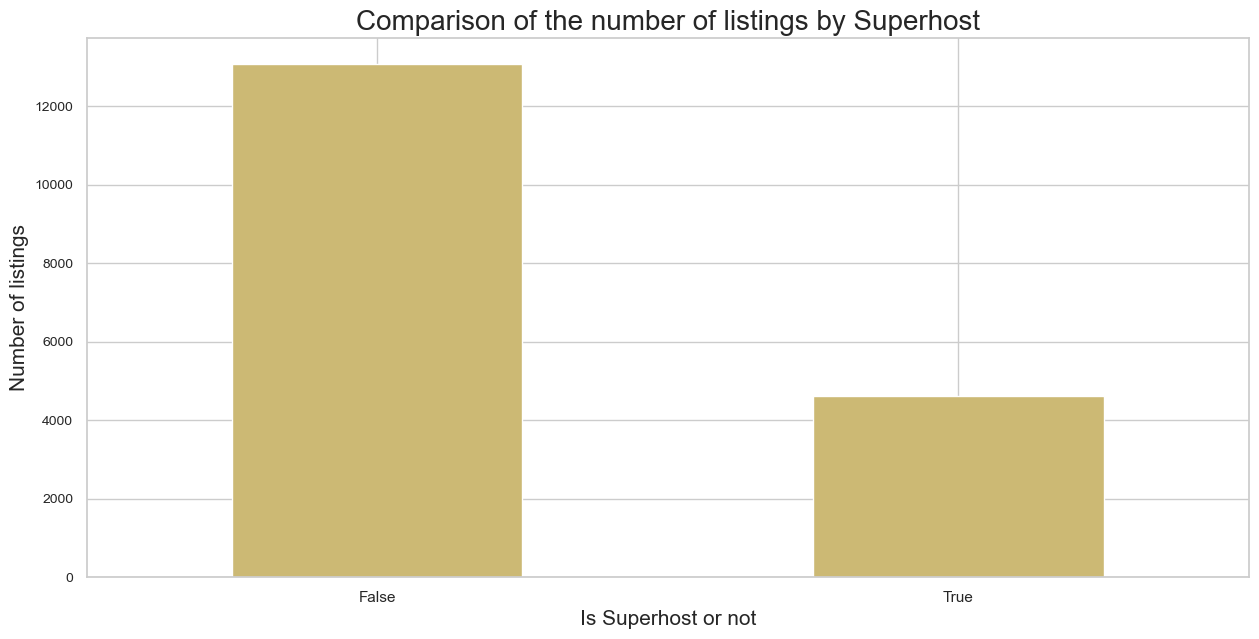

In [475]:
# We can check the superhost characteristics; 
df2.host_is_superhost = df2.host_is_superhost.replace({"t": "True", "f": "False"})

f5=df2['host_is_superhost'].value_counts()
f5.plot.bar(figsize=(15, 7), color='y', width=0.5, rot=0)
plt.title("Comparison of the number of listings by Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=15)
plt.xlabel('Is Superhost or not', fontsize=15)
plt.show()

It appears that Superhosts do not have many listings compared to non-super hosts; it could be superhosts may be fully booked most of the time; 

# 2.Which variables influences price the most? 
Now we can look at the variables influencing price 

In [478]:
# We start by inspecting the price variable 
df['price'].describe()


count         19751
unique         3837
top       $1,200.00
freq            342
Name: price, dtype: object

We can see that the price variable is of type object, meaning it is a categorial variable, it has values including dollar sign ($) so we need to transform the variable 

In [481]:
#We start by extracting price variable in the dataframe and convert the 
# strings into numeric then replace the values in the pricecolum 
price_b = []
for i in df2['price']:
  price_b.append(float(i[1:].replace(',','')))

#replace the price column with the new column
df2['price'] = price_b

In [483]:
#Now we can check the sumamry statistics for the trasformed price variable 
df2['price'].describe()

count    17695.000000
mean      1644.683357
std       1170.020212
min        154.000000
25%        800.000000
50%       1250.000000
75%       2114.000000
max       5557.000000
Name: price, dtype: float64

We can observe that the price variable contains outliers; the maximum value is  800,880 yet its mean value is   3,292. We can remove the outlier as it will affect the correlation results 

In [504]:
# We remove the outliers by omitting values that falls out of the quartiles; we create boolean variables    
# IQR
# Calculate the upper and lower limits
# Q1 = df2['price'].quantile(0.25)
# Q3 = df2['price'].quantile(0.75)
# IQR = Q3 - Q1
# lower = Q1 - 1.5*IQR
# upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
# upper_array = np.where(df2['price']>=upper)[0]
# lower_array = np.where(df2['price']<=lower)[0]
 
# Removing the outliers
# df2.drop(index=upper_array, inplace=True)
# df2.drop(index=lower_array, inplace=True)
 
print("New Shape: ", df2.shape)

#note I mask this code after the price variable is transformed to avoid error warnings when knitting the final markdown 

New Shape:  (17695, 72)


In [505]:
#check the new price variable 
df2['price'].describe()

count    17695.000000
mean      1644.683357
std       1170.020212
min        154.000000
25%        800.000000
50%       1250.000000
75%       2114.000000
max       5557.000000
Name: price, dtype: float64

We can now observe that the price variable do not have extreme outliers

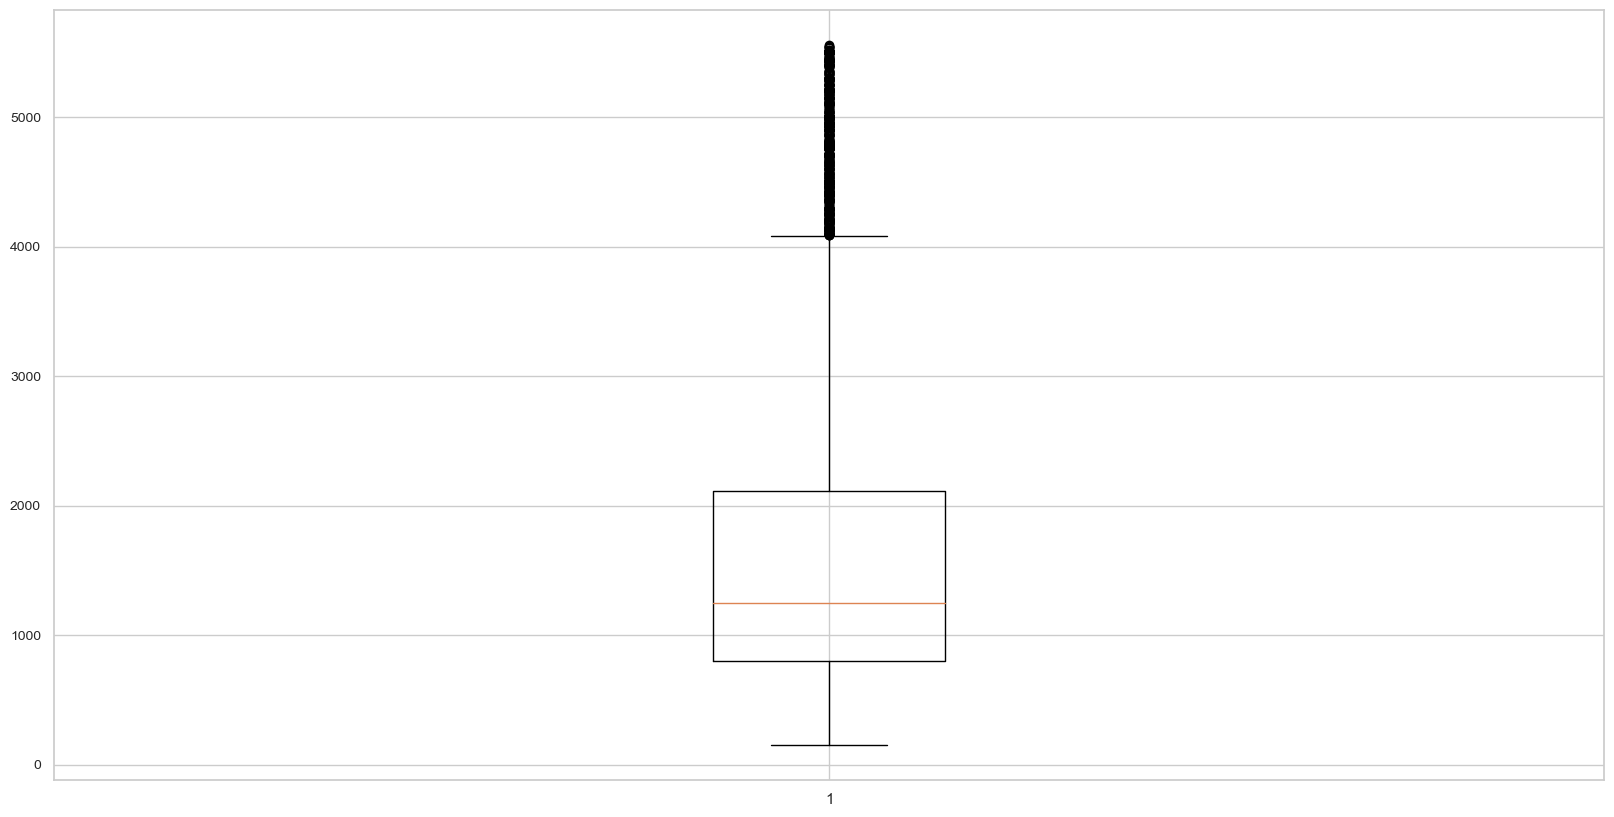

In [499]:
# The boxblot shows absence of extreme outliers like the 800,880 value observed earlier 
f6 = plt.figure(figsize =(20, 10))  
plt.boxplot(df2['price'])  

plt.show()

Text(0.5, 1.0, 'Histogram of listing prices within Cape Town')

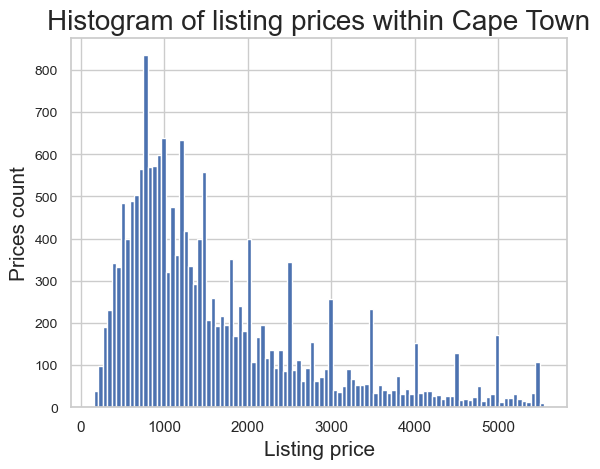

In [500]:
# A histogram of the listing prices can show the distribution of the variable 
df2['price'].hist(bins=100)
plt.ylabel('Prices count', fontsize=15)
plt.xlabel('Listing price', fontsize=15)
plt.title('Histogram of listing prices within Cape Town', fontsize=20)

In [530]:
# We can now explore the correlation between price and numerical variables in the dataset
#(we use kendall due to non parametric assumptions about the dataset)


corr = df2.corr(method = 'kendall')['price'].sort_values(ascending = 0).head(60)[1:]
corr

accommodates                                    0.482669
bedrooms                                        0.476442
beds                                            0.389137
maximum_minimum_nights                          0.205374
minimum_nights_avg_ntm                          0.175835
calculated_host_listings_count_entire_homes     0.174717
minimum_nights                                  0.152504
minimum_minimum_nights                          0.129942
review_scores_location                          0.116420
host_total_listings_count                       0.080379
host_listings_count                             0.076350
calculated_host_listings_count                  0.064625
review_scores_rating                            0.063025
review_scores_accuracy                          0.055690
review_scores_communication                     0.035487
review_scores_cleanliness                       0.033211
review_scores_checkin                           0.030729
id                             

We notice that total number of people booked (accommodates) had the highest influence on listing prices; 

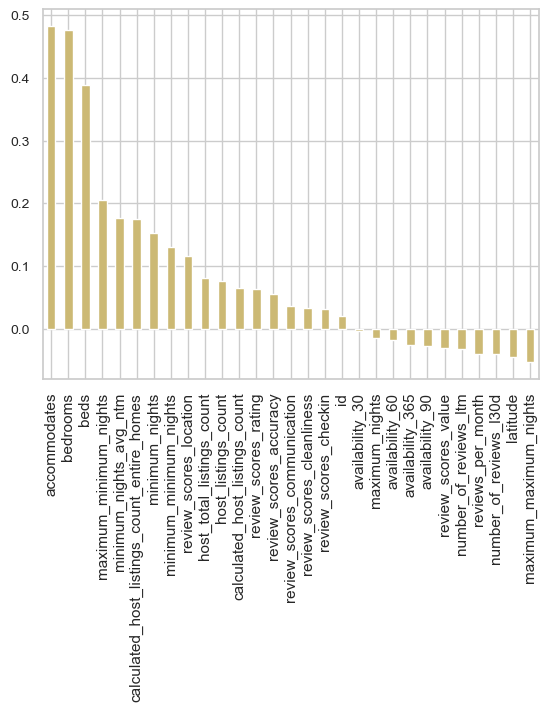

In [533]:
#We ignore SNS heatmap due to the multiple features; instead we use a simple plot
corr = df2.corr(method = 'kendall')['price'].sort_values(ascending = 0).head(30)[1:]
corr.plot(kind = 'bar', color = 'y');
plt.xticks(rotation=90);

In [585]:
# For categorical variables and relationship with Listing price we can do cross tabulations 
prop_Char = df2.groupby(['host_is_superhost','host_total_listings_count','property_type','room_type']).price.mean()
prop_Char = prop_Char.reset_index()
prop_Char=prop_Char.sort_values('price',ascending=[0])
prop_Char.head(20)


,host_is_superhost,host_total_listings_count,property_type,room_type,price
1096,True,39,Entire condo,Entire home/apt,5513.5
1090,True,36,Entire condo,Entire home/apt,5500.0
234,False,6,Entire bungalow,Entire home/apt,5500.0
684,False,100,Entire home,Entire home/apt,5500.0
683,False,100,Entire bungalow,Entire home/apt,5486.0
869,True,6,Entire serviced apartment,Entire home/apt,5456.0
1143,True,68,Entire villa,Entire home/apt,5401.0
552,False,32,Entire villa,Entire home/apt,5400.0
860,True,5,Room in hotel,Private room,5386.0
979,True,12,Entire vacation home,Entire home/apt,5120.0


# Can we predict listing prices for the Airbnb homestays within the city?


In [586]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import scipy.stats as stats

In [587]:
# Based on the correlations, we can select some variables to predict the listing prices 
# We create new dataframe selecting only the numerical columns
df2_num = df2.select_dtypes(include=['int64', 'float64'])

#drop the columns which has large number of null values, which will be a hinder while applying prediction algorithms
df2_num.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17695 entries, 0 to 19750
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17695 non-null  int64  
 1   scrape_id                                     17695 non-null  int64  
 2   host_id                                       17695 non-null  int64  
 3   host_listings_count                           17695 non-null  int64  
 4   host_total_listings_count                     17695 non-null  int64  
 5   latitude                                      17695 non-null  float64
 6   longitude                                     17695 non-null  float64
 7   accommodates                                  17695 non-null  int64  
 8   bedrooms                                      16563 non-null  float64
 9   beds                                          17430 non-null 

In [588]:
# We can add categorical columns to df2_num
df2_num[['superhost', 'room_type',  'host_acceptance_rate']] = df2[['host_is_superhost', 
                                                           'room_type',  'host_acceptance_rate']]

#drop the columns which has large number of null values, which will be a hinder while applying prediction algorithms
df2_num.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 17695 entries, 0 to 19750
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17695 non-null  int64  
 1   scrape_id                                     17695 non-null  int64  
 2   host_id                                       17695 non-null  int64  
 3   host_listings_count                           17695 non-null  int64  
 4   host_total_listings_count                     17695 non-null  int64  
 5   latitude                                      17695 non-null  float64
 6   longitude                                     17695 non-null  float64
 7   accommodates                                  17695 non-null  int64  
 8   bedrooms                                      16563 non-null  float64
 9   beds                                          17430 non-null 

In [589]:
df2_num['host_acceptance_rate'].unique()

array(['100%', '0%', '99%', '89%', nan, '33%', '82%', '50%', '94%', '87%',
       '25%', '85%', '96%', '88%', '90%', '86%', '75%', '67%', '78%',
       '93%', '79%', '92%', '73%', '80%', '74%', '97%', '91%', '60%',
       '71%', '98%', '70%', '8%', '36%', '64%', '62%', '83%', '55%',
       '52%', '61%', '58%', '69%', '77%', '68%', '20%', '40%', '56%',
       '30%', '95%', '53%', '14%', '66%', '48%', '39%', '27%', '46%',
       '65%', '81%', '17%', '54%', '42%', '84%', '59%', '63%', '43%',
       '47%', '57%', '35%', '38%', '72%', '29%', '76%', '7%', '31%',
       '37%', '23%', '51%', '41%', '13%', '5%', '11%', '22%', '49%',
       '44%', '15%', '45%', '18%', '24%', '10%', '28%', '21%', '16%',
       '26%'], dtype=object)

In [591]:
# We convert categorical variables into numerical variables 

cat_int = {"superhost":     {"True": 1, "False": 0} }

df2_num = df2_num
df2_num = df2_num.replace(cat_int)

In [592]:
# We convert host_acceptance_rate to numeric
df2_num['host_acceptance_rate']=df2_num['host_acceptance_rate'].str.rstrip("%").astype(float)/100

df2_num['host_acceptance_rate'].unique()

array([1.  , 0.  , 0.99, 0.89,  nan, 0.33, 0.82, 0.5 , 0.94, 0.87, 0.25,
       0.85, 0.96, 0.88, 0.9 , 0.86, 0.75, 0.67, 0.78, 0.93, 0.79, 0.92,
       0.73, 0.8 , 0.74, 0.97, 0.91, 0.6 , 0.71, 0.98, 0.7 , 0.08, 0.36,
       0.64, 0.62, 0.83, 0.55, 0.52, 0.61, 0.58, 0.69, 0.77, 0.68, 0.2 ,
       0.4 , 0.56, 0.3 , 0.95, 0.53, 0.14, 0.66, 0.48, 0.39, 0.27, 0.46,
       0.65, 0.81, 0.17, 0.54, 0.42, 0.84, 0.59, 0.63, 0.43, 0.47, 0.57,
       0.35, 0.38, 0.72, 0.29, 0.76, 0.07, 0.31, 0.37, 0.23, 0.51, 0.41,
       0.13, 0.05, 0.11, 0.22, 0.49, 0.44, 0.15, 0.45, 0.18, 0.24, 0.1 ,
       0.28, 0.21, 0.16, 0.26])

In [593]:
# We finally create dummy variables for room_type
df2_num = pd.get_dummies(df2_num)

df2_num .info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17695 entries, 0 to 19750
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17695 non-null  int64  
 1   scrape_id                                     17695 non-null  int64  
 2   host_id                                       17695 non-null  int64  
 3   host_listings_count                           17695 non-null  int64  
 4   host_total_listings_count                     17695 non-null  int64  
 5   latitude                                      17695 non-null  float64
 6   longitude                                     17695 non-null  float64
 7   accommodates                                  17695 non-null  int64  
 8   bedrooms                                      16563 non-null  float64
 9   beds                                          17430 non-null 

In [594]:
# count the number of NaN values in each row
num_nans = df2_num.isnull().sum(axis=1)
num_nans

0        0
1        1
2        0
3        0
4        0
        ..
19746    8
19747    8
19748    8
19749    8
19750    9
Length: 17695, dtype: int64

In [596]:
#Inmpute NaNs and split the data

df3_num= df2_num
fill_mode = lambda col: col.fillna(col.mode()[0])

df3_num.apply(fill_mode, axis=0)


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,superhost,host_acceptance_rate,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3191,20230329174558,3754,1,2,-33.947390,18.476000,2,1.0,1.000000,...,1,0,0,0.610000,0.0,1.000000,1,0,0,0
1,1048451,20230329174558,5589045,1,1,-33.823120,18.477780,2,1.0,2.099139,...,1,0,0,0.010000,0.0,0.000000,1,0,0,0
2,15007,20230329174558,59072,4,13,-33.800010,18.460630,6,3.0,4.000000,...,3,0,0,0.370000,0.0,1.000000,1,0,0,0
3,473856,20230329174558,2349400,4,5,-33.926360,18.414590,2,1.0,2.000000,...,4,0,0,1.300000,1.0,0.990000,1,0,0,0
4,15077,20230329174558,59342,7,7,-33.858356,18.490376,2,1.0,2.000000,...,1,5,0,0.060000,0.0,0.890000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19746,857009276610970207,20230329174558,34496867,8,10,-34.102380,18.393900,6,3.0,3.000000,...,8,0,0,1.007332,1.0,0.980000,1,0,0,0
19747,857061319768307338,20230329174558,102737010,6,13,-33.924499,18.412232,2,1.0,1.000000,...,5,1,0,1.007332,0.0,1.000000,1,0,0,0
19748,857116008461436507,20230329174558,62093209,9,10,-33.952884,18.474598,1,4.0,1.000000,...,1,8,0,1.007332,1.0,0.860000,0,0,1,0
19749,857118666957317725,20230329174558,255727382,12,13,-34.022810,18.439219,1,1.0,1.000000,...,12,0,0,1.007332,1.0,0.950000,1,0,0,0


In [607]:
#split the data 
x=df3_num.drop(['price', 'scrape_id','latitude', 'longitude'], 1, inplace=False)

y=df3_num['price']


In [631]:

#Splitting into training and testing set
# Train using 70% of the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Instantiate the model and implement Random Forest Regressor
forest = RandomForestClassifier(n_estimators =100, max_depth =15)
forest = forest.fit(x_train, y_train)

In [636]:
# Predict based on the model we've trained
#y_pred = forest.predict(x_test)

comp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comp_df.sample(10)

,Actual,Predicted
10630,600.0,1000.0
19061,1014.0,800.0
9179,1209.0,1500.0
197,1081.0,850.0
9347,629.0,629.0
6224,775.0,850.0
18191,2200.0,2000.0
1962,1900.0,1200.0
5588,750.0,850.0
8547,700.0,1000.0


In [635]:
# Accuracy score

print('The accuracy score is :',accuracy_score(y_pred,y_test))

The accuracy score is : 0.06611414579016764
